## **CHEMBL Database**

## **Installing libraries**

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 596 kB 45.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


## **Importing necessary libraries**

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

**Target search for Aromatase**

In [ ]:
target = new_client.target
target_query = target.search('aromatase')

In [ ]:
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


## **Select and retrieve bioactivity data for Human Aromatase (first entry)**

In [ ]:
selected_target = targets['target_chembl_id'][0]
selected_target

'CHEMBL1978'

Here, we will retrieve only bioactivity data for Human Aromatase (CHEMBL1978) that are reported as pChEMBL values.

In [ ]:
activity = new_client.activity
result = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
bioactivity_df = pd.DataFrame.from_dict(result)

In [ ]:
bioactivity_df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054


In [ ]:
bioactivity_df.shape

(2894, 45)

Finally we will save the resulting bioactivity data to a CSV file bioactivity_data.csv.

In [ ]:
bioactivity_df.to_csv('aromatase_bioactivity_data.csv', index = False)

## **Handling missing data**

If any compounds has missing value for the standard_value and canonical_smiles column then drop it.

In [ ]:
bioactivity_df['standard_value'].isna().sum()

76

In [ ]:
# Percentage of missing value in standard_value

(76/2894)*100


2.626123013130615

In [ ]:
bioactivity_df['canonical_smiles'].isna().sum()

0

In [ ]:
# Drop the 3% missing values in standard_value

bioactivity_df = bioactivity_df[bioactivity_df['standard_value'].notna()]

In [ ]:
# No of unique values in canonical_smiles

bioactivity_df['canonical_smiles'].nunique()

2071

In [ ]:
# Removing duplicate canonical smiles

bioactivity_df = bioactivity_df.drop_duplicates(['canonical_smiles'])

In [ ]:
bioactivity_df.shape

(2071, 45)

## **Data pre-processing of the bioactivity data**

## **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
processed_df = bioactivity_df[selection]
processed_df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2889,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,5.24
2890,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,104.0
2891,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,17.7
2892,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,60.4


In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2893
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  2071 non-null   object
 1   canonical_smiles    2071 non-null   object
 2   standard_value      2071 non-null   object
dtypes: object(3)
memory usage: 64.7+ KB


Saves dataframe to CSV file

In [ ]:
processed_df.to_csv('aromatase_bioactivity_data_preprocessed.csv', index=False)

## **Labeling compounds as either being active, inactive or intermediate**

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [ ]:
df = pd.read_csv('aromatase_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df['standard_value']:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
final_df = pd.concat([df, bioactivity_class], axis=1)
final_df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,5.24,active
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,104.00,active
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,17.70,active
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,60.40,active


In [ ]:
final_df.isna().sum()

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
class                 0
dtype: int64

Saves dataframe to CSV file

In [ ]:
final_df.to_csv('aromatase_bioactivity_data_curated.csv', index=False)

In [ ]:
! zip aromatase.zip *.csv

  adding: aromatase_bioactivity_data.csv (deflated 90%)
  adding: aromatase_bioactivity_data_curated.csv (deflated 81%)
  adding: aromatase_bioactivity_data_preprocessed.csv (deflated 79%)


In [ ]:
! ls -l

total 1884
-rw-r--r-- 1 root root 1432391 Jun 22 00:55 aromatase_bioactivity_data.csv
-rw-r--r-- 1 root root  152494 Jun 22 00:56 aromatase_bioactivity_data_curated.csv
-rw-r--r-- 1 root root  133443 Jun 22 00:56 aromatase_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  199830 Jun 22 00:56 aromatase.zip
drwxr-xr-x 1 root root    4096 Jun 15 13:42 sample_data


## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-06-22 00:56:39--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   113MB/s    in 0.7s    

2022-06-22 00:56:40 (113 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## **Load bioactivity data**

In [ ]:
curated_df = pd.read_csv('aromatase_bioactivity_data_curated.csv')

In [ ]:
curated_df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,5.24,active
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,104.00,active
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,17.70,active
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,60.40,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

## **Calculate Lipinski descriptors**


Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

# **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## **Calculate descriptors**

In [ ]:
def lipinski(smiles, verbose=False):

    mol_data= []
    for element in smiles:
        mol = Chem.MolFromSmiles(element) 
        mol_data.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in mol_data:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
lipinski_df = lipinski(df_clean_smiles['canonical_smiles'])


## **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
lipinski_df

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2066,383.451,4.53580,3.0,5.0
2067,384.439,3.93080,3.0,6.0
2068,384.439,3.93080,3.0,6.0
2069,384.435,4.65920,3.0,5.0


In [ ]:
curated_df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,5.24,active
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,104.00,active
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,17.70,active
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,60.40,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([curated_df, lipinski_df], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,5.24,active,383.451,4.53580,3.0,5.0
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,104.00,active,384.439,3.93080,3.0,6.0
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,17.70,active,384.439,3.93080,3.0,6.0
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,60.40,active,384.435,4.65920,3.0,5.0


## **Convert IC50 to pIC50**

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

- Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9 
- Take the molar value and apply -log10
- Delete the standard_value column and create a new pIC50 column

In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value',axis =  1)
        
    return x

In [ ]:
# Dropped the standard_value of 0

df_combined = df_combined[df_combined['standard_value'] != 0]

In [ ]:
df_combined['standard_value'].describe()

count      2070.000000
mean      14602.374557
std       51283.581801
min           0.015000
25%         130.000000
50%        1251.000000
75%        8875.000000
max      777000.000000
Name: standard_value, dtype: float64

In [ ]:
pIC50 = []
for i in df_combined['standard_value']:
  molar = i*(10**-9) # Converts nM to M
  pIC50.append(-np.log10(molar))

#pIC50

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0.0,3.0


In [ ]:
df_combined['pIC50'] = pIC50
df_combined

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,5.24,active,383.451,4.53580,3.0,5.0,8.280669
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,104.00,active,384.439,3.93080,3.0,6.0,6.982967
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,17.70,active,384.439,3.93080,3.0,6.0,7.752027
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,60.40,active,384.435,4.65920,3.0,5.0,7.218963


In [ ]:
df_combined['pIC50'].describe()

count    2070.000000
mean        6.047340
std         1.295428
min         3.109579
25%         5.051837
50%         5.902743
75%         6.886057
max        10.823909
Name: pIC50, dtype: float64

In [ ]:
df_combined.drop('standard_value', axis = 1)
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0.0,3.0,7.267606


## **Removing the 'intermediate' bioactivity class**


Here, we will be removing the intermediate class from our data set.

In [ ]:
class_df = df_combined[df_combined['class'] != 'intermediate']
class_df


,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,41.00,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,5.24,active,383.451,4.53580,3.0,5.0,8.280669
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,104.00,active,384.439,3.93080,3.0,6.0,6.982967
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,17.70,active,384.439,3.93080,3.0,6.0,7.752027
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,60.40,active,384.435,4.65920,3.0,5.0,7.218963


In [ ]:
class_df['class'].value_counts()


active      988
inactive    486
Name: class, dtype: int64

In [ ]:
486/1474, 988/1474

(0.32971506105834464, 0.6702849389416553)

Let's write this to CSV file.

In [ ]:
class_df.to_csv('aromatase_bioactivity_data_2class_pIC50.csv', index = False)

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

## **Frequency plot of the 2 bioactivity classes**

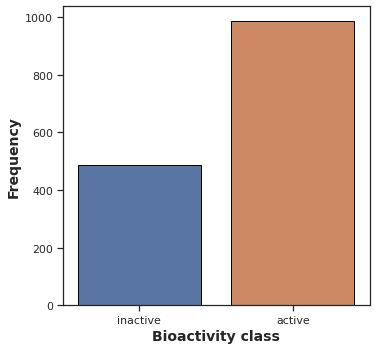

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data= class_df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

## **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

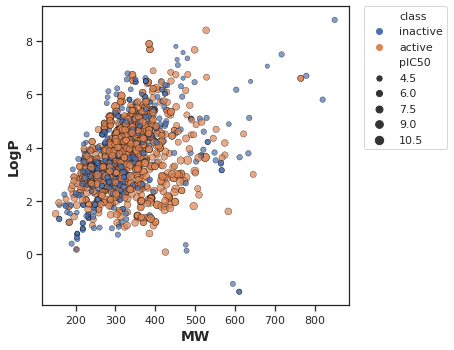

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data= class_df, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## **Box plots**

## **pIC50 value**

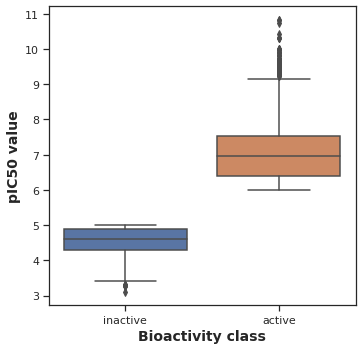

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = class_df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

## **Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = class_df[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  #selection = [descriptor, 'class']
  #df = class_df[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.009414e-214,0.05,Different distribution (reject H0)


## **MW**

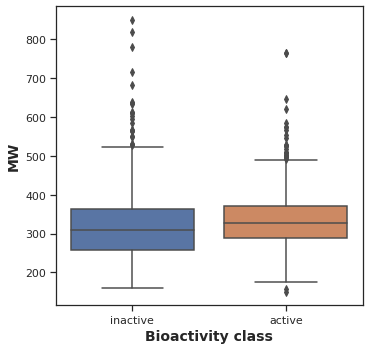

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = class_df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,207695.0,0.000012,0.05,Different distribution (reject H0)


## **LogP**

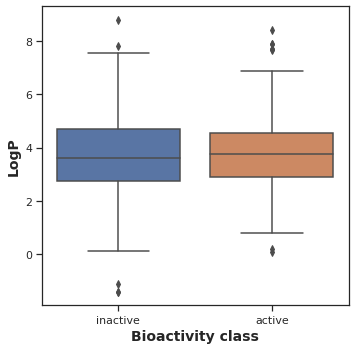

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = class_df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,238649.5,0.425964,0.05,Same distribution (fail to reject H0)


## **NumHDonors**

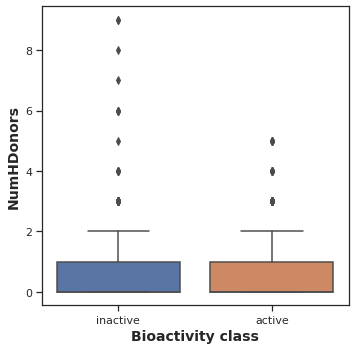

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = class_df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,224850.5,0.012661,0.05,Different distribution (reject H0)


## **Interpretation of Statistical Results**

**Box Plots**

**pIC50 values**
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

**Lipinski's descriptors**
Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited no difference between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows statistically significant difference between actives and inactives.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: aromatase_bioactivity_data_preprocessed.csv (deflated 79%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: aromatase_bioactivity_data_curated.csv (deflated 81%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: aromatase_bioactivity_data.csv (deflated 90%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW.pdf (deflated 37%)


## **Download PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-06-22 01:01:49--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-06-22 01:01:49--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   127MB/s    in 0.2s    

2022-06-22 01:01:50 (127 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-06-22 01:01:50--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
df = pd.read_csv('aromatase_bioactivity_data_2class_pIC50.csv')

In [ ]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2.0,2.0,4.301030
1,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0.0,3.0,6.623423
2,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0.0,3.0,7.244125
3,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0.0,3.0,7.267606
4,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,41.0,active,319.383,4.63450,0.0,3.0,7.387216


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
selection_df = df[selection]
selection_df.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021
CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21	CHEMBL41761


In [ ]:
! cat molecule.smi | wc -l

1474


## **Calculate fingerprint descriptors**

## **Calculate PaDEL descriptors**

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL2111947 in molecule.smi (1/1474). 
Processing CHEMBL431859 in molecule.smi (2/1474). 
Processing CHEMBL113637 in molecule.smi (3/1474). Average speed: 4.64 s/mol.
Processing CHEMBL112021 in molecule.smi (4/1474). Average speed: 2.77 s/mol.
Processing CHEMBL41761 in molecule.smi (5/1474). Average speed: 2.08 s/mol.
Processing CHEMBL111868 in molecule.smi (6/1474). Average speed: 1.68 s/mol.
Processing CHEMBL112074 in molecule.smi (8/1474). Average speed: 1.30 s/mol.
Processing CHEMBL111888 in molecule.smi (7/1474). Average speed: 1.49 s/mol.
Processing CHEMBL324326 in molecule.smi (9/1474). Average speed: 1.19 s/mol.
Processing CHEMBL353068 in molecule.smi (10/1474). Average speed: 1.07 s/mol.
Processing CHEMBL166709 in molecule.smi (11/1474). Average speed: 1.02 s/mol.
Processing CHEMBL424556 in molecule.smi (12/1474). Average speed: 0.92 s/mol.
Processing CHEMBL1630261 in molecule.smi (13/1474). Average speed: 0.89 s/mol.
Processing CHEMBL169251 in molecule.smi (14/14

In [ ]:
! ls -l

total 113332
-rw-r--r-- 1 root root   191203 Jun 22 01:07 aromatase_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root  1432391 Jun 22 00:55 aromatase_bioactivity_data.csv
-rw-r--r-- 1 root root   152494 Jun 22 00:56 aromatase_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   133443 Jun 22 00:56 aromatase_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   199830 Jun 22 00:56 aromatase.zip
-rw-r--r-- 1 root root  2631184 Jun 22 01:14 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Jun 22 01:06 __MACOSX
-rw-r--r-- 1 root root      125 Jun 22 01:01 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      123 Jun 22 01:01 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      129 Jun 22 01:01 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      122 Jun 22 01:01 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    85214 Jun 22 01:09 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Des

## **Preparing the X and Y Data Matrices**

##**X data matrix**

In [ ]:
data = pd.read_csv('aromatase_bioactivity_data_2class_pIC50.csv')

In [ ]:
X = pd.read_csv('descriptors_output.csv')

In [ ]:
X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2111947,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL41761,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,CHEMBL4755831,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1470,CHEMBL4750835,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1471,CHEMBL4745681,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1472,CHEMBL4778401,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = X.drop(columns=['Name'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1470,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1471,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1472,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

## **Convert IC50 to pIC50**

In [ ]:
y = data['pIC50']
y

0       4.301030
1       6.623423
2       7.244125
3       7.267606
4       7.387216
          ...   
1469    8.280669
1470    6.982967
1471    7.752027
1472    7.218963
1473    6.357535
Name: pIC50, Length: 1474, dtype: float64

 Let's examine the data dimension

In [ ]:
X.shape, y.shape

((1474, 161), (1474,))

## **Combining X and Y variable**

In [ ]:
dataset = pd.concat([X, y], axis = 1)

In [ ]:
dataset

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.301030
1,CHEMBL2111947,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.623423
2,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.244125
3,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.267606
4,CHEMBL41761,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.387216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,CHEMBL4755831,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.280669
1470,CHEMBL4750835,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.982967
1471,CHEMBL4745681,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.752027
1472,CHEMBL4778401,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.218963


In [ ]:
dataset.drop('Name', axis = 1)
dataset.to_csv('aromatase_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1474, 161)

## **Data split (80/20 ratio)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((1179, 161), (1179,))

In [ ]:
X_test.shape, y_test.shape

((295, 161), (295,))

## **Building a Regression Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state = 9)
model.fit(X_train, y_train)
#r2 = model.score(X_test, y_test)
#r2

RandomForestRegressor(random_state=9)

In [ ]:
#model.score(X_test, y_test)

0.5695551117350809

In [ ]:
y_pred = model.predict(X_test)

## **Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show>

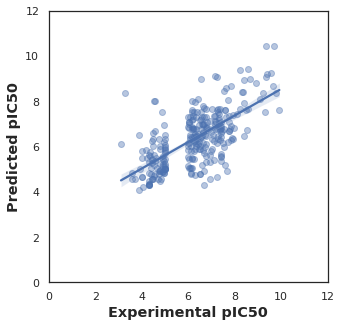

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = y_test, y = y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
r2_score(y_test, y_pred)

0.3970495663833302

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.0718949229152637